# 01. Linear Regression from Scratch 
### (Theory+Intuition+Code)

Linear Regression is one of the most common and simplest Supervised Learning algorithms used to estimate or predict outcomes for linearly related problems.<br/>
In this notebook, I will explain and implement this algorithm in a simple and understandable way, covering all the fundamental theories and intuitions behind it. The implementation will use only NumPy and Pandas libraries. I will try to explain everything with proper background information and visual aids.<br/><br/>
Let's get started...

### What is a Linear problem?
A problem where the relationship between variables can be **modeled** or **approximated** by a straight line. This doesn't necessarily mean the relationship is perfectly linear in the real world, but it can be reasonably represented by a linear equation. Like, the age of a person and their BMI index can be paired as `(Age,BMI) : (20,26.87)`. Or maybe relation between 3 different data, like, the age, BMI index, and Gender - `(Age,BMI,Gender) : (23,29.12,Male)`.<br>
The relationship can be expressed as: $$ y = wx + b $$ where, $y$ is the dependent variable, $x$ is the independent variable, $w$ is the slope, and $b$ is the y-intercept. <br>
And the problem relating to this linear data could be estimnating BMI by age, or maybe predicting BMI by Gender, or maybe classifying Gender by BMI.<br><br>

### What is Supervised Learning?
It is basically learning by supervision. It's a process of learning that involves supervised methods of learning from actual samples and predicting a possible outcome of an unseen sample. In ML & AI, Supervised learning uses labeled datasets to train algorithms to predict outcomes and recognize patterns. <br>
In the context of linear problems, this often involves predicting the output variable $y$ by learning to adjust the parameters $w$ and $b$ in a linear equation (like $y = wx + b$) to best fit the relationship between the input variable $x$ and the output $y$."

### What is Linear Regression?
Just to draw a line between a problem to solve it! It is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data. In essence, it aims to find the best-fitting line that describes the relationship between the variables. But how can it create or estimate such a line?<br>
By leveraging supervised learning principles, linear regression estimates the generalized outcome for any given input within the range of the observed data. This is achieved by finding the optimal values for the parameters $w$ and $b$ in the linear equation:
$$
f_{w,b}(x) = wx+b \\
\hat{y} = f_{w,b}(x) =f(x)
$$

where, $\hat{y}$ is the predicted value of the output variable $y$ for a given input $x$ based on the estimated line. The goal of linear regression is to find the values of $w$ and $b$ that minimize the difference between the predicted values ($\hat{y}$) and the actual values of ${y}$ in the training data.

## Create a dataset

To demonstrate Linear Regression, I'll create a custom dataset from scratch to ensure randomness and avoid any bias that might come from using well-known datasets.<br>
The dataset will consist of 10 samples with 5 columns representing arbitrary health records and indicators: `Name, Age, Health_Factor, BMI, and Risk`. This simplified dataset will help us understand the core concepts of Linear Regression.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
name = np.array(
    ['Jarvis', 'Clemont', 'Tyron', 'Sasha', 'Anissa', 'Oswald', 'Rupert', 'Tobey', 'Issa', 'Bloom']
)

age = np.array(
    [23, 32, 19, 37, 25, 27, 29, 33, 43, 34]
)

height = np.array(  # height in meters
    [1.75, 1.68, 1.57, 1.87, 1.55, 1.73, 1.78, 1.66, 1.62, 1.78]
)

weight = np.array( # weight in kg
    [80, 95, 60, 75, 98, 112, 102, 78, 88, 72]
)

# Calculate BMI (weight in kg / (height in meters)^2)
bmi = weight / (height**2)

health_factor = np.array(
    ((bmi/100) * age)/10
)
risk = health_factor * bmi

print(f"Name=\n{name}\nAge=\n{age}\nHeight=\n{height}\nWeight=\n{weight}\nBMI:\n{bmi}\nH_Factor:\n{health_factor}\nRisk:\n{risk}")

Name=
['Jarvis' 'Clemont' 'Tyron' 'Sasha' 'Anissa' 'Oswald' 'Rupert' 'Tobey'
 'Issa' 'Bloom']
Age=
[23 32 19 37 25 27 29 33 43 34]
Height=
[1.75 1.68 1.57 1.87 1.55 1.73 1.78 1.66 1.62 1.78]
Weight=
[ 80  95  60  75  98 112 102  78  88  72]
BMI:
[26.12244898 33.65929705 24.34175829 21.44756785 40.79084287 37.42189849
 32.19290494 28.30599506 33.53147386 22.72440348]
H_Factor:
[0.60081633 1.07709751 0.46249341 0.79356001 1.01977107 1.01039126
 0.93359424 0.93409784 1.44185338 0.77262972]
Risk:
[15.69479384 36.2543449  11.25790273 17.01993216 41.59732156 37.81075914
 30.05511072 26.44056877 48.34746879 17.55754947]


In [3]:
df = pd.DataFrame({'name': name, 'age': age, 'height': height, 'weight': weight, 'bmi': bmi, 'hf': health_factor, 'risk': risk})
df

,name,age,height,weight,bmi,hf,risk
0,Jarvis,23,1.75,80,26.122449,0.600816,15.694794
1,Clemont,32,1.68,95,33.659297,1.077098,36.254345
2,Tyron,19,1.57,60,24.341758,0.462493,11.257903
3,Sasha,37,1.87,75,21.447568,0.793560,17.019932
4,Anissa,25,1.55,98,40.790843,1.019771,41.597322
5,Oswald,27,1.73,112,37.421898,1.010391,37.810759
6,Rupert,29,1.78,102,32.192905,0.933594,30.055111
7,Tobey,33,1.66,78,28.305995,0.934098,26.440569
8,Issa,43,1.62,88,33.531474,1.441853,48.347469
9,Bloom,34,1.78,72,22.724403,0.772630,17.557549


Let's visualize our dataset by plotting each variable against the patient names. This visualization will help us examine the distribution of values across all columns, ensuring our dataset is well-distributed and suitable for demonstrating linear regression concepts.

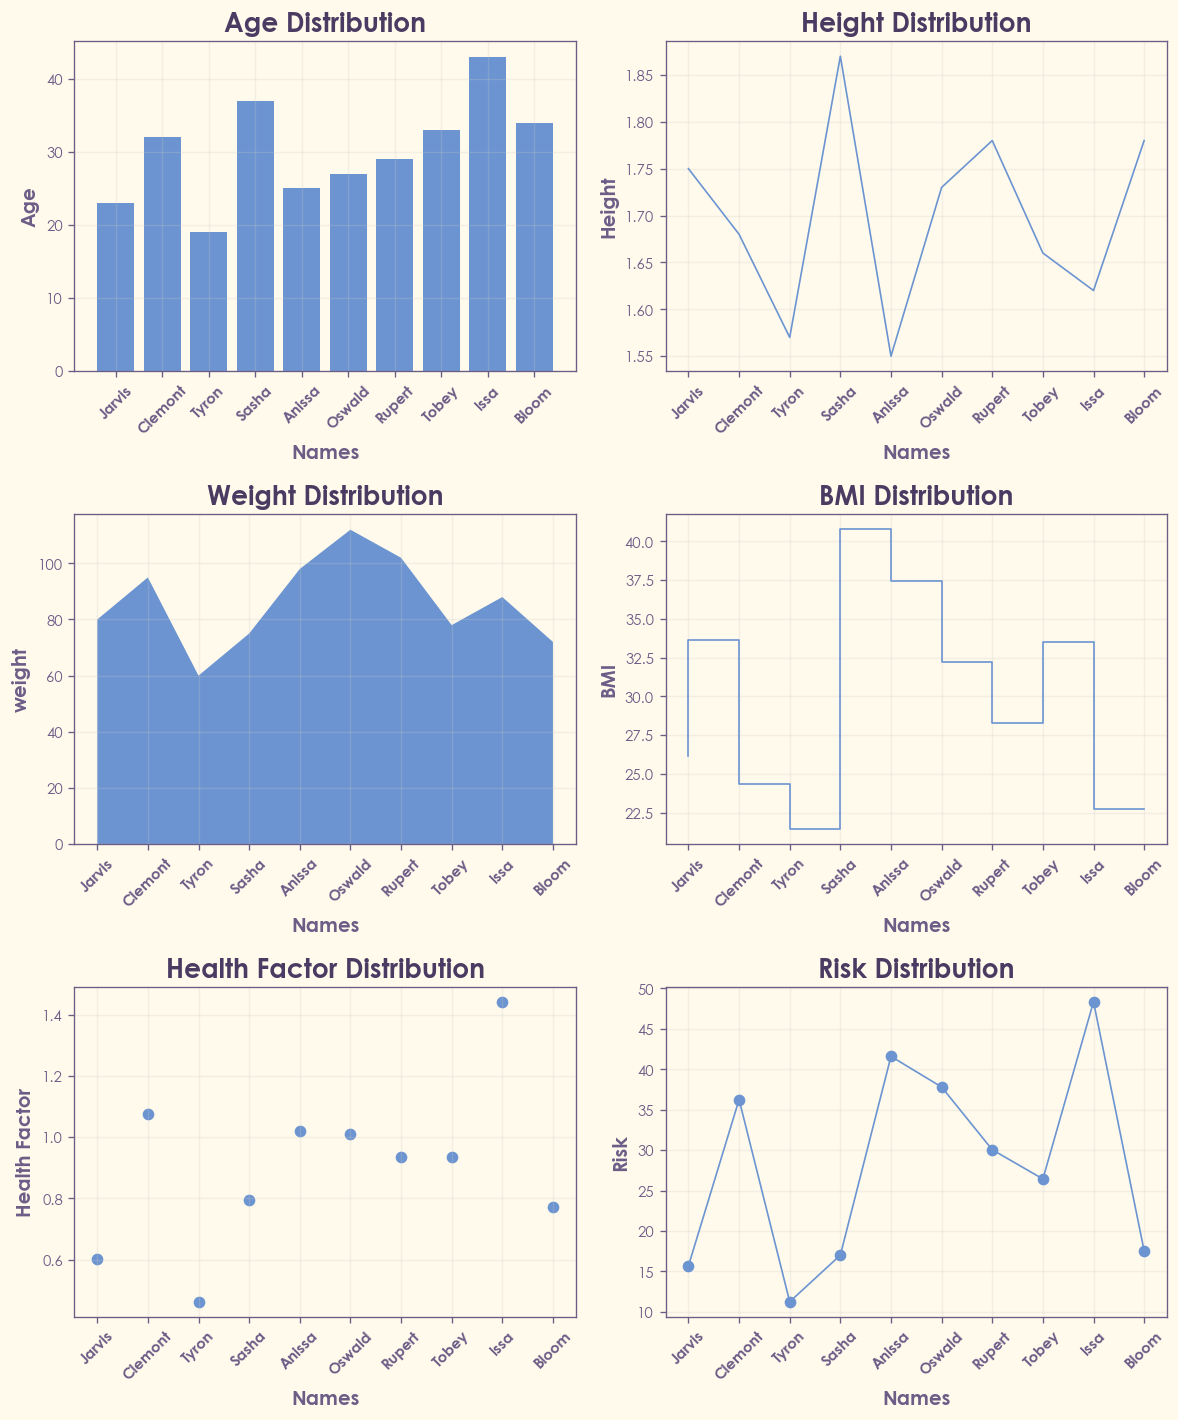

In [4]:
plt.figure(figsize=(10, 12))  # Adjusted height for better aspect ratio

# AGE vs NAME
plt.subplot(3, 2, 1)
plt.bar(df['name'], df['age'])
plt.ylabel('Age')
plt.xlabel('Names')
plt.xticks(rotation=45, weight='bold')
plt.title('Age Distribution')

# HEIGHT vs NAME
plt.subplot(3, 2, 2)
plt.plot(df['name'], df['height'])
plt.ylabel('Height')
plt.xlabel('Names')
plt.xticks(rotation=45, weight='bold')
plt.title('Height Distribution')

# WEIGHT vs NAME
plt.subplot(3, 2, 3)
plt.stackplot(df['name'], df['weight'])
plt.ylabel('weight')
plt.xlabel('Names')
plt.xticks(rotation=45, weight='bold')
plt.title('Weight Distribution')

# BMI vs NAME
plt.subplot(3, 2, 4)
plt.step(df['name'], df['bmi'])
plt.ylabel('BMI')
plt.xlabel('Names')
plt.xticks(rotation=45, weight='bold')
plt.title('BMI Distribution')

# HEALTH_FACTOR vs NAME
plt.subplot(3, 2, 5)
plt.scatter(df['name'], df['hf'])
plt.ylabel('Health Factor')
plt.xlabel('Names')
plt.xticks(rotation=45, weight='bold')
plt.title('Health Factor Distribution')

# RISK vs NAME
plt.subplot(3, 2, 6)
plt.plot(df['name'], df['risk'], 'o-')
plt.ylabel('Risk')
plt.xlabel('Names')
plt.xticks(rotation=45, weight='bold')
plt.title('Risk Distribution')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

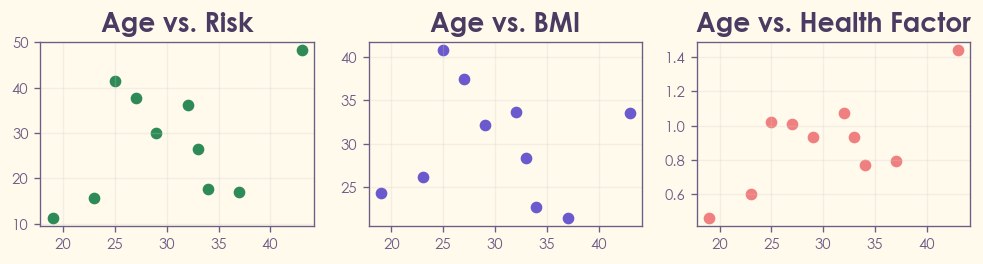

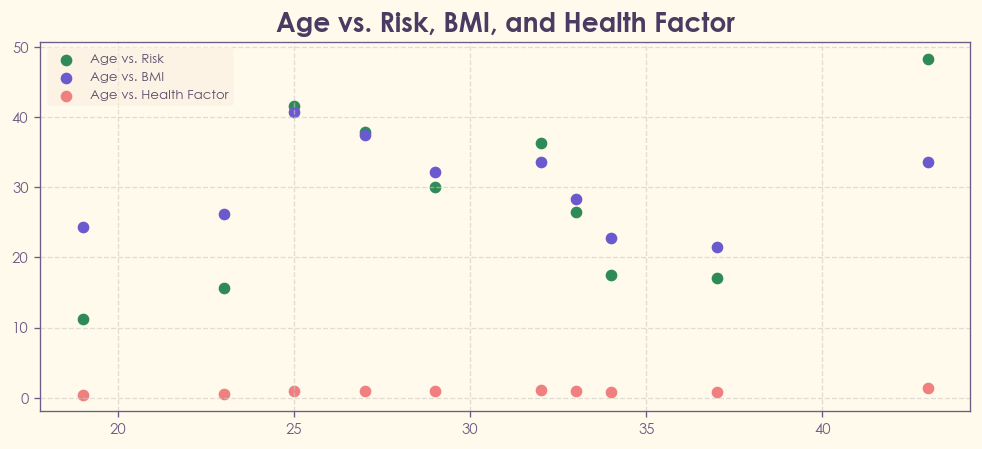

In [5]:
# Create the figure and subplots (2 rows, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(10, 2))

axes[0].set_title('Age vs. Risk')
axes[0].scatter(df['age'], df['risk'], color='seagreen')
axes[1].set_title('Age vs. BMI')
axes[1].scatter(df['age'], df['bmi'], color='slateblue')
axes[2].set_title('Age vs. Health Factor')
axes[2].scatter(df['age'], df['hf'], color='lightcoral')

plt.figure(figsize=(10, 4))
plt.title('Age vs. Risk, BMI, and Health Factor')
plt.scatter(df['age'], df['risk'], color='seagreen', label='Age vs. Risk')
plt.scatter(df['age'], df['bmi'], color='slateblue', label='Age vs. BMI')
plt.scatter(df['age'], df['hf'], color='lightcoral', label='Age vs. Health Factor')
plt.legend(fontsize=8)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [6]:
w = np.random.rand()/10 # initially random
b = 0 # initially zero for simplicity
x = df['age']

y_hat = w * x + b
print(y_hat)
print(f'\nRandomly Selected Value of w = {w}')

0    1.644489
1    2.287984
2    1.358491
3    2.645482
4    1.787488
5    1.930487
6    2.073486
7    2.359484
8    3.074479
9    2.430983
Name: age, dtype: float64

Randomly Selected Value of w = 0.0714995013279123


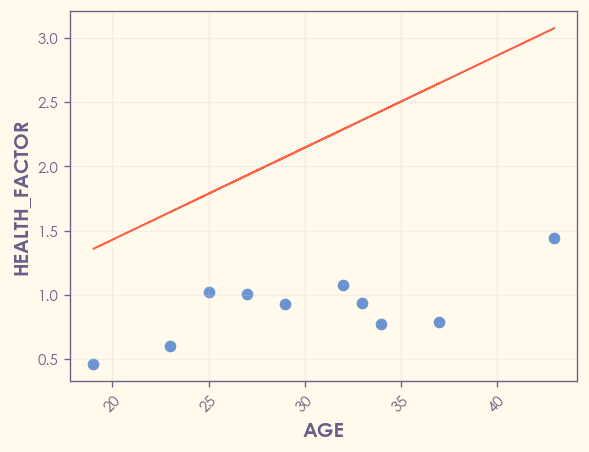

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(df['age'],df['hf'])
plt.ylabel('HEALTH_FACTOR')
plt.xlabel('AGE')
plt.xticks(rotation = 45)
plt.subplot(1,2,1)
plt.plot(x,y_hat,'-', color='tomato')
plt.show()

In [8]:
print('Differences in y:')
errs = y_hat - df['hf']
err_data = {'hf':df['hf'], 'y^':y_hat, 'diff':errs}
err_df = pd.DataFrame(err_data)
print(err_df.to_markdown(index=False, numalign="center", stralign="center"))

Differences in y:
|    hf    |   y^    |   diff   |
|:--------:|:-------:|:--------:|
| 0.600816 | 1.64449 | 1.04367  |
|  1.0771  | 2.28798 | 1.21089  |
| 0.462493 | 1.35849 | 0.895997 |
| 0.79356  | 2.64548 | 1.85192  |
| 1.01977  | 1.78749 | 0.767716 |
| 1.01039  | 1.93049 | 0.920095 |
| 0.933594 | 2.07349 | 1.13989  |
| 0.934098 | 2.35948 | 1.42539  |
| 1.44185  | 3.07448 | 1.63263  |
| 0.77263  | 2.43098 | 1.65835  |


In [9]:
w_s = [] # w values
J_w = [] # costs
i = 0

In [10]:
j = 150
start = -10 * w
stop = 10 * w
step = (20*w/150)

# Generate the 10 values using np.arange
ws = np.arange(start, stop + step, step)[:j]
print(f'Selected Various Value of w :\n{ws}')
print(f'\nTotal Length of w = {len(ws)}')

Selected Various Value of w :
[-7.14995013e-01 -7.05461746e-01 -6.95928480e-01 -6.86395213e-01
 -6.76861946e-01 -6.67328679e-01 -6.57795412e-01 -6.48262145e-01
 -6.38728879e-01 -6.29195612e-01 -6.19662345e-01 -6.10129078e-01
 -6.00595811e-01 -5.91062544e-01 -5.81529277e-01 -5.71996011e-01
 -5.62462744e-01 -5.52929477e-01 -5.43396210e-01 -5.33862943e-01
 -5.24329676e-01 -5.14796410e-01 -5.05263143e-01 -4.95729876e-01
 -4.86196609e-01 -4.76663342e-01 -4.67130075e-01 -4.57596808e-01
 -4.48063542e-01 -4.38530275e-01 -4.28997008e-01 -4.19463741e-01
 -4.09930474e-01 -4.00397207e-01 -3.90863941e-01 -3.81330674e-01
 -3.71797407e-01 -3.62264140e-01 -3.52730873e-01 -3.43197606e-01
 -3.33664340e-01 -3.24131073e-01 -3.14597806e-01 -3.05064539e-01
 -2.95531272e-01 -2.85998005e-01 -2.76464738e-01 -2.66931472e-01
 -2.57398205e-01 -2.47864938e-01 -2.38331671e-01 -2.28798404e-01
 -2.19265137e-01 -2.09731871e-01 -2.00198604e-01 -1.90665337e-01
 -1.81132070e-01 -1.71598803e-01 -1.62065536e-01 -1.52532269

In [11]:
from tqdm import tqdm
import matplotlib.animation as animation

In [12]:
for j in tqdm(range(0, j), desc="Training Progress"): # Use tqdm here
    diff = np.array(y_hat - df['hf'])
    cost = (1/(2*len(df['hf']))) * np.sum(diff**2)  # (1/2m)*sum((y^-y)**2)
    w_s.append(w)
    J_w.append(cost)

    if j % 10 == 0:
        print(f"| EPOCH- {j+1:03d} | Target y = {df['hf'][0]:.2f} | Present y^ = {y_hat[0]:.2f}   | Previous Weight = {w:.2f} | Present Weight = {ws[i]:.2f} | Cost = {cost:.2f}   |")
        
    w = ws[i]
    i += 1
    y_hat = w * x + b


print("\n\n\=========AFTER TRAINING========/")
print('Last `w` Value:\t = ', w)
print('Total Iterations:\t =', i)
print("\===============================/")
y_hat = w * x + b

Training Progress: 100%|███████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 3333.22it/s]

| EPOCH- 001 | Target y = 0.60 | Present y^ = 1.64   | Previous Weight = 0.07 | Present Weight = -0.71 | Cost = 0.85   |
| EPOCH- 011 | Target y = 0.60 | Present y^ = -14.47   | Previous Weight = -0.63 | Present Weight = -0.62 | Cost = 207.87   |
| EPOCH- 021 | Target y = 0.60 | Present y^ = -12.28   | Previous Weight = -0.53 | Present Weight = -0.52 | Cost = 152.08   |
| EPOCH- 031 | Target y = 0.60 | Present y^ = -10.09   | Previous Weight = -0.44 | Present Weight = -0.43 | Cost = 105.00   |
| EPOCH- 041 | Target y = 0.60 | Present y^ = -7.89   | Previous Weight = -0.34 | Present Weight = -0.33 | Cost = 66.61   |
| EPOCH- 051 | Target y = 0.60 | Present y^ = -5.70   | Previous Weight = -0.25 | Present Weight = -0.24 | Cost = 36.92   |
| EPOCH- 061 | Target y = 0.60 | Present y^ = -3.51   | Previous Weight = -0.15 | Present Weight = -0.14 | Cost = 15.93   |
| EPOCH- 071 | Target y = 0.60 | Present y^ = -1.32   | Previous Weight = -0.06 | Present Weight = -0.05 | Cost = 3.64   |
| EPOC

In [13]:
len(w_s)

150

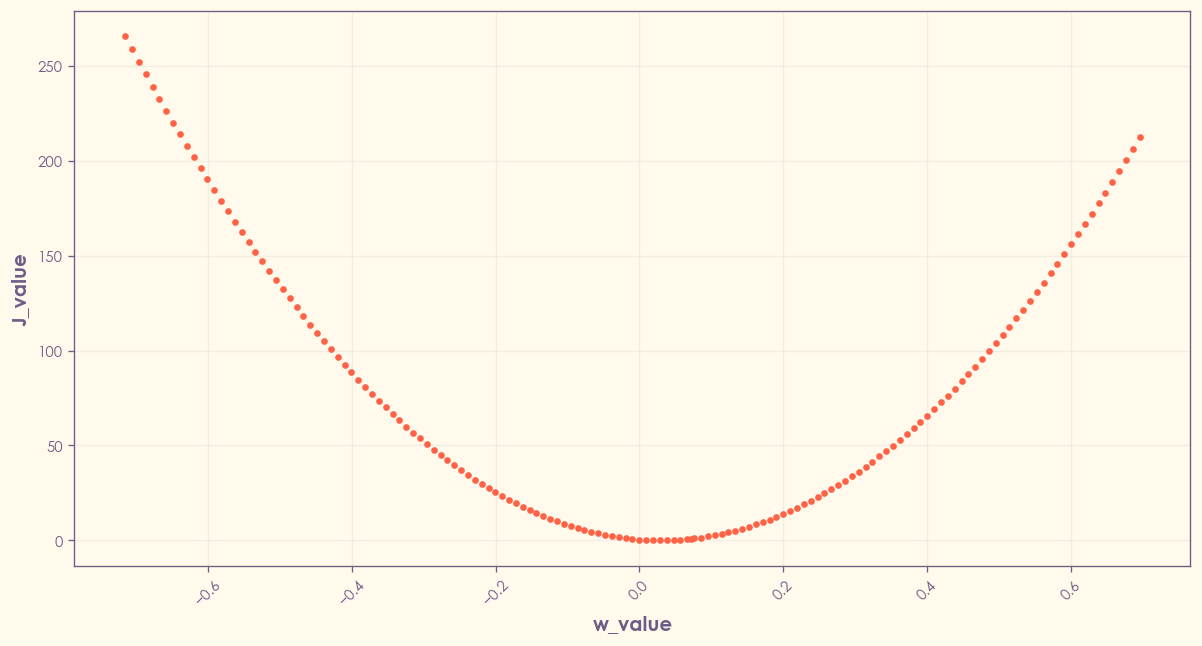

In [14]:
w_s = np.array(w_s)
J_w = np.array(J_w)

plt.figure(figsize=(12,6))
plt.plot(w_s, J_w, '.', color='tomato')
plt.ylabel('J_value')
plt.xlabel('w_value')
plt.xticks(rotation = 45)
plt.show()

<img src="linear_regression_animation.gif" width=50%></img>

In [15]:
len(w_s),len(J_w)

(150, 150)

In [16]:
idx = np.argmin(J_w)
print(f'Minimum of J\t: {min(J_w)}')
print(f'Best of w\t: {w_s[idx]}')

Minimum of J	: 0.017574431606056807
Best of w	: 0.02859980053116873


In [17]:
w = w_s[idx]
y_hat = w * x + b
print(f"y_hat = {y_hat}")

y_hat = 0    0.657795
1    0.915194
2    0.543396
3    1.058193
4    0.714995
5    0.772195
6    0.829394
7    0.943793
8    1.229791
9    0.972393
Name: age, dtype: float64


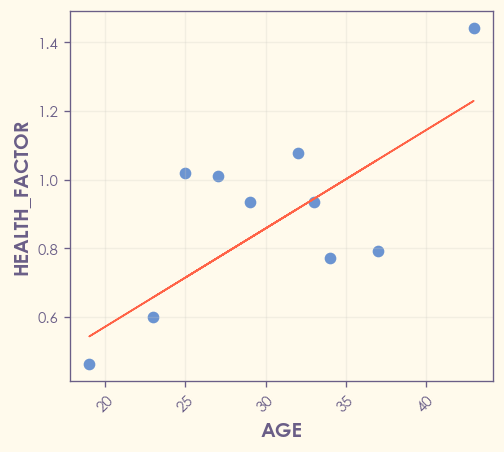

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(df['age'],df['hf'])
plt.ylabel('HEALTH_FACTOR')
plt.xlabel('AGE')
plt.xticks(rotation = 45)
plt.subplot(1,2,1)
plt.plot(x,y_hat,'-', color='tomato')
plt.show()

In [ ]:
from matplotlib.widgets import Slider

# Enable interactive mode for Jupyter Notebook
%matplotlib notebook

x_values = np.linspace(10, 70, 60)  # x range
y_hat_values = w * x_values + b      # Our Regression line

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 7))
plt.subplots_adjust(bottom=0.25)  # Adjust for slider space

# Plot the data points
ax.scatter(df['age'], df['hf'], label='Data Points', color='purple', alpha=0.35)

# Plot the regression line
line, = ax.plot(x_values, y_hat_values, '-', label='Regression Line')
point, = ax.plot([], [], 'rh', label='Estimated Point')  # Interactive point

# Add a dynamic text annotation
text_annotation = ax.text(10, 0.5, '', fontsize=7, weight='bold', color='slateblue',
                          bbox=dict(facecolor='aliceblue', alpha=0.65))

# Labels and legend
ax.set_title("Interactive Regression Line with Data Points\n", fontsize=26)
ax.set_xlabel("AGE", fontsize=20)
ax.set_ylabel("HEALTH_FACTOR", fontsize=20)
ax.legend()
ax.grid(True)

# Add sliders
ax_slider = plt.axes([0.25, 0.1, 0.65, 0.03])  # Slider position [left, bottom, width, height]
slider = Slider(ax_slider, 'x', 10, 70, valinit=30, valstep=1)

# Update function for the slider
def update(val):
    x = slider.val  # Get current slider value
    y_hat = w * x + b  # Compute y_hat
    point.set_data([x], [y_hat])  # Update point coordinates
    
    # Update the text annotation
    text_annotation.set_text(f"AGE : {x}\nHEALTH_FACTOR : {y_hat:.2f}")
    text_annotation.set_position((x - 5, y_hat + 0.08))  # Position near the point
    
    fig.canvas.draw_idle()  # Redraw the canvas

# Connect the slider to the update function
slider.on_changed(update)

# Show the plot
#plt.show()

# plt.savefig('linear_regression_predicted.png', dpi=600)  # Save with default 600 DPI

<img src="linear_regression_predicted.png" width=70%></img>